# 1. Autoencoder

In [3]:
import keras
from keras import layers
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)  
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
input_img=keras.Input(shape=(32,32,3))
encoding_dim=32
encoded=layers.Dense(encoding_dim,activation='relu')(input_img)
decoded=layers.Dense(3,activation='sigmoid')(encoded)
autoencoder=keras.Model(input_img,decoded)


In [10]:
autoencoder=tfk.Sequential()
tfkl=tfk.layers
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu', input_shape=(32,32,3)))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=2, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.UpSampling2D())
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.Conv2D(3,kernel_size=1, strides=1, padding='same', activation='sigmoid'))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9

In [12]:
result=autoencoder.fit(x_train, x_train, epochs=20, steps_per_epoch=10, batch_size=128)

Epoch 1/20
10/10 [==============================] - 5s 532ms/step - loss: 0.6518 - accuracy: 0.4164
Epoch 2/20
10/10 [==============================] - 5s 532ms/step - loss: 0.5857 - accuracy: 0.5261
Epoch 3/20
10/10 [==============================] - 5s 525ms/step - loss: 0.5701 - accuracy: 0.5739
Epoch 4/20
10/10 [==============================] - 5s 524ms/step - loss: 0.5690 - accuracy: 0.6158
Epoch 5/20
10/10 [==============================] - 5s 528ms/step - loss: 0.5626 - accuracy: 0.6475
Epoch 6/20
10/10 [==============================] - 5s 531ms/step - loss: 0.5606 - accuracy: 0.6671
Epoch 7/20
10/10 [==============================] - 5s 537ms/step - loss: 0.5633 - accuracy: 0.6860
Epoch 8/20
10/10 [==============================] - 5s 531ms/step - loss: 0.5616 - accuracy: 0.6843
Epoch 9/20
10/10 [==============================] - 5s 539ms/step - loss: 0.5557 - accuracy: 0.6956
Epoch 10/20
10/10 [==============================] - 5s 534ms/step - loss: 0.5566 - accuracy: 0.7039

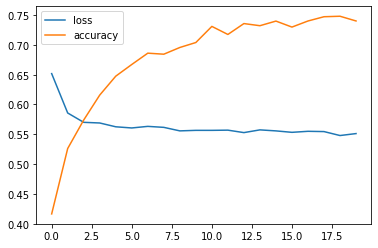

In [13]:
plt.plot(result.history['loss'])
plt.plot(result.history['accuracy'])
plt.legend(labels=['loss','accuracy'])

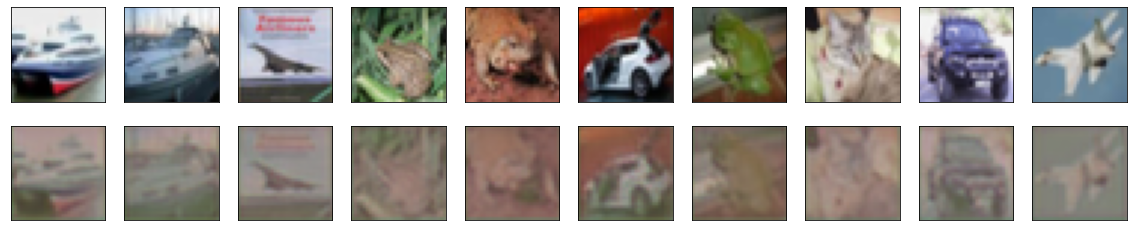

In [15]:
n =10
plt.figure(figsize=(20,4))

for i in range(1, n + 1):
    
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #predict
    ax = plt.subplot(2, n, i + n)
    plt.imshow(autoencoder.predict(x_test)[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2.1 Deep CNN

In [16]:
layers = tfk.layers
model1= tfk.Sequential()

In [17]:
model1.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu', input_shape=(32,32,3))) 
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.25))

model1.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Dropout(0.25))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)             

In [18]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
from keras.utils import to_categorical
train_label=to_categorical(y_train)
test_label=to_categorical(y_test)

In [21]:
result2=model1.fit(x_train,train_label,steps_per_epoch=100,epochs=20, batch_size=128, validation_data=(x_test,test_label))

Epoch 1/20
100/100 [==============================] - 24s 241ms/step - loss: 2.0007 - accuracy: 0.2730 - val_loss: 1.8785 - val_accuracy: 0.3534
Epoch 2/20
100/100 [==============================] - 24s 238ms/step - loss: 1.8651 - accuracy: 0.3288 - val_loss: 1.7286 - val_accuracy: 0.3945
Epoch 3/20
100/100 [==============================] - 25s 245ms/step - loss: 1.7547 - accuracy: 0.3695 - val_loss: 1.5818 - val_accuracy: 0.4546
Epoch 4/20
100/100 [==============================] - 24s 238ms/step - loss: 1.6875 - accuracy: 0.3934 - val_loss: 1.6192 - val_accuracy: 0.4298
Epoch 5/20
100/100 [==============================] - 24s 238ms/step - loss: 1.6307 - accuracy: 0.4110 - val_loss: 1.5435 - val_accuracy: 0.4608
Epoch 6/20
100/100 [==============================] - 24s 237ms/step - loss: 1.5956 - accuracy: 0.4225 - val_loss: 1.4615 - val_accuracy: 0.4938
Epoch 7/20
100/100 [==============================] - 29s 295ms/step - loss: 1.5576 - accuracy: 0.4387 - val_loss: 1.3823 - val_ac

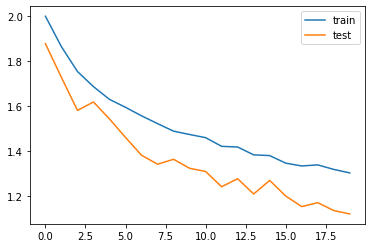

In [24]:
plt.plot(result2.history['loss'])
plt.plot(result2.history['val_loss'])
plt.legend(labels=['train','test'])

# 2.2 Transfer Learning


In [25]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [26]:
model2=tfk.Sequential()

In [28]:
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(784, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
Total params: 14,798,480
Trainable params: 83,792
Non-trainable params: 14,714,688
_________________________________________________________________


In [29]:
conv_base.trainable = False
len(model2.trainable_weights)

4

In [33]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
result3=model2.fit(x_train, train_label, epochs=5, batch_size=64,validation_data=(x_test,test_label))

Epoch 1/5


ValueError: ignored

In [ ]:
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.legend(labels=['train','test'])

In [ ]:
plt.plot(results3.history['accuracy'])
plt.plot(results3.history['val_accuracy'])
plt.legend(labels=['train','test'])

# 3.1 RNN


In [ ]:
spam = pd.read_csv('SPAM_detection.csv')
spam

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
x = spam['Message']
y = spam['category_val']